**ANN TO MODEL THE IMPACT OF ECONOMIC OPENNESS ON POLITICAL STABILITY (1996-2021)**

There's is a part of political science literature that affirms that greater economic and financial openness could improve a country's domestic political stability and governance. In this project, I test this assumption using a regressor Artificial Neural Network. 

**The Data**

Compiled from the World Bank's Data Base and the Worldwide Governance Indicators project (https://www.worldbank.org/en/publication/worldwide-governance-indicators). The variables are:

1. Country
2. Country Code (abbreviation)
3. Year, from 1996 to 2021
4. Stability Score: an aggregate of the individual WGI scores raging from 0 (less stable) to 100 (more stable
5. FDI % GDP: foreign direct investment as % of national GDP
6. Trade % of GDP: Total volume of trade (exports and imports) as % of national GDP

In [85]:
#First packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
#Loading dataframe
df = pd.read_csv('StabilityTradeData.csv', na_values = 'NaN', na_filter = True)
df.columns = [['Country','Code', 'Year','Stability','FDI % GDP','Trade % of GDP']]
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4922 entries, 0 to 4921
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Country,)         4922 non-null   object 
 1   (Code,)            4922 non-null   object 
 2   (Year,)            4922 non-null   int64  
 3   (Stability,)       4753 non-null   float64
 4   (FDI % GDP,)       4202 non-null   float64
 5   (Trade % of GDP,)  3972 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 230.8+ KB


**Checking and replacing NaNs**

We need to deal with missing values before running the ANN and there are quite a lot of them.

In [87]:
df.isnull().sum().sort_values(ascending = False)

Trade % of GDP    950
FDI % GDP         720
Stability         169
Country             0
Code                0
Year                0
dtype: int64

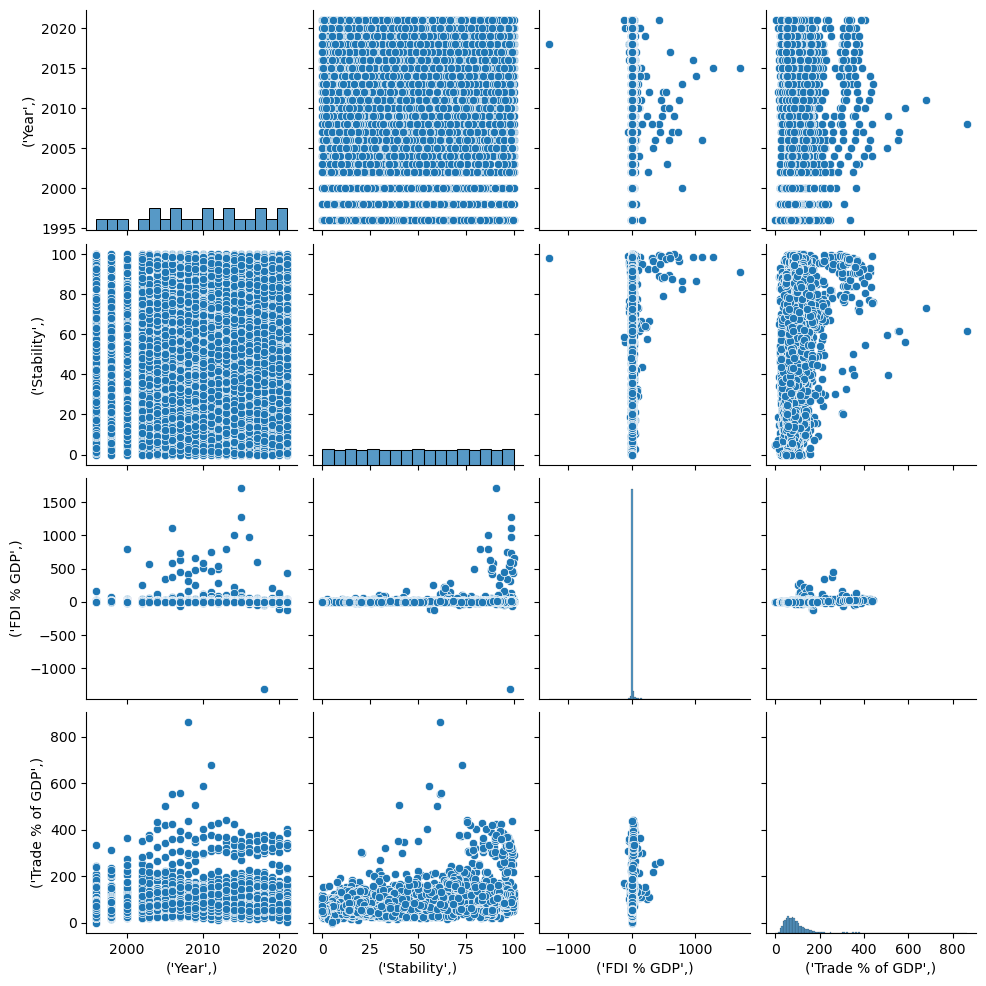

In [88]:
sns.pairplot(data = df)
plt.show()

Based on the distribution of each variable, a smart statistical approach will be:
1. Replace FDI with the mean
2. Replace Trade with the Median
3. Get rid of missing Stability scores, since there's no reliable way of substituting them

In [83]:
fill_values = {'FDI % GDP' : df['FDI % GDP'].mean(),
               'Trade % of GDP': df['Trade % of GDP'].median()}

clean_df = df.fillna(value = fill_values)
clean_df = clean_df.dropna()

Country           0
Code              0
Year              0
Stability         0
FDI % GDP         0
Trade % of GDP    0
dtype: int64

**Preparing dataset and running ANN**

In [89]:
#Preparing the data
model_df = clean_df[['Stability','FDI % GDP','Trade % of GDP']]

X = model_df.drop('Stability', axis = 1)
y = model_df['Stability']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

#Scaling data to avoid large values messing up with the neural weights later.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

C:\Users\Vinicius\AppData\Local\Temp\ipykernel_17376\2830388217.py:4: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X = model_df.drop('Stability', axis = 1)


In [92]:
#Creating and training the network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam 

model = Sequential()

model.add(Dense(2,activation = 'leaky_relu')) #Sine we have two variables I'll use only two neurons to start
model.add(Dense(2,activation = 'leaky_relu')) 
model.add(Dense(2,activation = 'leaky_relu')) 
model.add(Dense(1))

opt = Adam(learning_rate=0.001, clipnorm=1.0)

model.compile(optimizer=opt, loss ='mse') 

from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 10)

model.fit(x=X_train,
          y=y_train, 
          validation_data = (X_test, y_test),
          batch_size = 128,
          epochs= 300,
          callbacks = [early_stop])

Epoch 1/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 3363.8809 - val_loss: 3300.4792
Epoch 2/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3359.0090 - val_loss: 3296.5193
Epoch 3/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3354.7805 - val_loss: 3291.9219
Epoch 4/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3349.8152 - val_loss: 3286.8328
Epoch 5/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3344.4927 - val_loss: 3281.4045
Epoch 6/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3339.0745 - val_loss: 3276.0862
Epoch 7/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3333.5422 - val_loss: 3270.5217
Epoch 8/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3327.8201 - val_loss: 3264.7234
Epoch 9/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3321.8506 - val_loss: 3258.6782
Epoch 10/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3315.5706 - val_loss: 3252.3704
Epoch 11/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3309.0525 - val_loss: 3245.7

**Evaluating Results**

Let's monitor both for regression metrics and model overfitting.

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
MAE:  24.12502670288086
MSE:  773.6029052734375
R2:  0.08537632931766614


<Axes: >

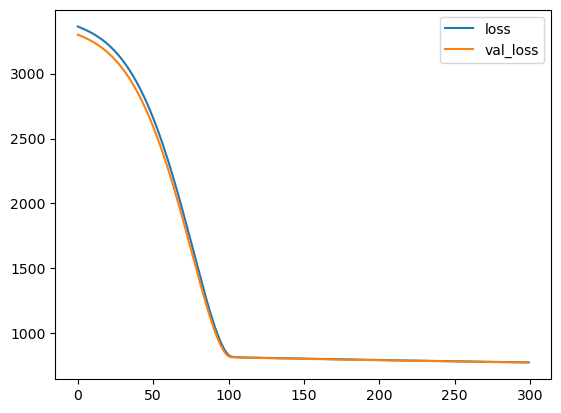

In [95]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

test_predictions = model.predict(X_test)

#Regression metrics
print('MAE: ', mean_absolute_error(y_test, test_predictions))
print('MSE: ', mean_squared_error(y_test, test_predictions)) 
print('R2: ', explained_variance_score(y_test, test_predictions)) 

#Checking for overfitting
losses = pd.DataFrame(model.history.history)
losses.plot()

It looks like there was no overfitting in the ANN which is good, but the regression results were not quite good. The predictive power of this set of variables was little more than 8%, and the MAE was very large for 100-point scale set.

This suggests that economic factors might not be enough to explain stability and domestic politics.